In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/Iris.csv")

In [3]:
df.head()

,Unnamed: 0,Class,Petal length,Sepal length,Sepal width,Petal width
0,0,1,51,35,14,2
1,1,1,49,30,14,2
2,2,1,47,32,13,2
3,3,1,46,31,15,2
4,4,1,50,36,14,2


In [4]:
df.columns

Index(['Unnamed: 0', 'Class', 'Petal length', 'Sepal length', 'Sepal width',
       'Petal width'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
y_col = 'Class'
y = df[y_col]
X = df[df.columns.drop(y_col)]

In [7]:
    # from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
a = np.zeros((3, 3))
a[0][0] = a[0][0] + 1
a[2][0] = 4
print(a)

[[1. 0. 0.]
 [0. 0. 0.]
 [4. 0. 0.]]


In [9]:
from sklearn.model_selection import LeaveOneOut 
from sklearn import svm
# from sklearn.metrics import confusion_matrix
loo = LeaveOneOut()
loo.get_n_splits(X)
confusion_matrix = np.zeros((3, 3))
for train_id, test_id in loo.split(X,y):
        X_train, X_test, y_train, y_test = X.loc[train_id], X.loc[test_id], y.loc[train_id],y.loc[test_id]
        clf = svm.LinearSVC(C=0.1,max_iter=100000).fit(X_train, y_train) # Train an SVM
        y_test_pred = clf.predict(X_test)
        if y_test.iloc[0] == y_test_pred:
            if y_test.iloc[0] == 1:
                confusion_matrix[0][0] = confusion_matrix[0][0] + 1
            elif y_test.iloc[0] == 2:
                confusion_matrix[1][1] = confusion_matrix[1][1] + 1
            else: 
                confusion_matrix[2][2] = confusion_matrix[2][2] + 1
        else:
            if y_test.iloc[0] == 1 and y_test_pred == 2:
                confusion_matrix[1][0] = confusion_matrix[1][0] + 1
            elif y_test.iloc[0] == 1 and y_test_pred == 3:
                confusion_matrix[2][0] = confusion_matrix[2][0] + 1
            elif y_test.iloc[0] == 2 and y_test_pred == 3:
                confusion_matrix[2][1] = confusion_matrix[2][1] + 1
            elif y_test.iloc[0] == 2 and y_test_pred == 1:
                confusion_matrix[0][1] = confusion_matrix[0][1] + 1
            elif y_test.iloc[0] == 3 and y_test_pred == 1:
                confusion_matrix[0][2] = confusion_matrix[0][2] + 1
            elif y_test.iloc[0] == 3 and y_test_pred == 2:
                confusion_matrix[1][2] = confusion_matrix[1][2] + 1
                                                            
        

In [10]:
confusion_matrix
# df['Class'].values
# import seaborn as sn
# import matplotlib.pyplot as plt
# confusion_matrix = pd.crosstab(y_test,y_test_pred, rownames=['Actual'], colnames=['Predicted'])
# 

array([[50.,  0.,  0.],
       [ 0., 46.,  3.],
       [ 0.,  4., 47.]])

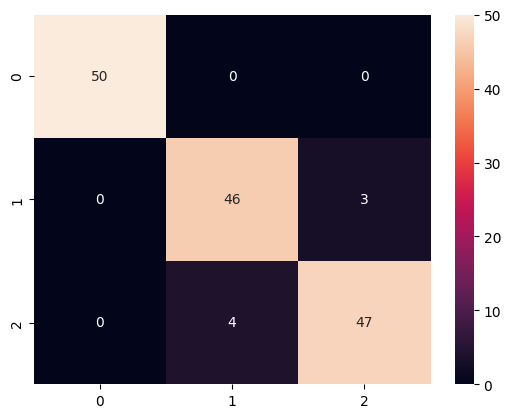

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix, annot=True)
plt.show()

The confusion matrix shows a very good training. All of the records with label 0 are accurately predited, and respectively, 92 and 94 percent of the records belonging to classes  1 and 2 are predicted accurately. This results in a total accuracy of 95.3 percent.

1

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [34]:
for deg in range(1,11):
    svclassifier = SVC(kernel='poly', degree = deg)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    my_accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
    error_rate = 1 - my_accuracy
    print('classification error rate for degree', deg, "is: ",error_rate)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

classification error rate for degree 1 is:  0.033333333333333326
classification error rate for degree 2 is:  0.0
classification error rate for degree 3 is:  0.033333333333333326
classification error rate for degree 4 is:  0.0
classification error rate for degree 5 is:  0.0
classification error rate for degree 6 is:  0.0
classification error rate for degree 7 is:  0.0
classification error rate for degree 8 is:  0.0
classification error rate for degree 9 is:  0.033333333333333326
classification error rate for degree 10 is:  0.033333333333333326


2

In [35]:
svclassifier = SVC(kernel='poly', degree = 2)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [36]:
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])

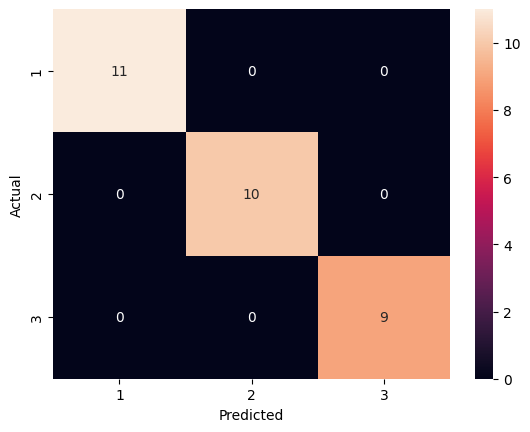

In [37]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

The optimal degree for polynomial models are 2, 4, 5, 6, 7, and 8. All the records will be accurately predicted with this method. So it performs better than part A.